# **Import Libraries and Dataset**

In [ ]:
# Install UCI ML Repo(Run only the first time)
# !pip install xgboost
# !pip install tensorflow
# !pip install keras-tuner

### **Import Dataset**

In [ ]:
# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [ ]:
# Import Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Preprocessing Modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# Import Fine tuning libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit, RandomizedSearchCV, GridSearchCV


# Import Evaluation Metrics
from sklearn import metrics
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix
from keras_tuner import RandomSearch, HyperParameters

# Import Models
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import tensorflow as tf

In [ ]:
# Importing data from the UCI archives
adult = fetch_ucirepo(id=2)
df = pd.DataFrame(data=adult.data.original, columns=adult.feature_names)
print(df.shape)
df.head()

(48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **Data Discovery**

In [ ]:
# Summary statistics for numerical columns
print(df.describe())

# Information about the dataset, including data types and missing values
print(df.info())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries

### **Encode Target Variable**

In [ ]:
df.groupby('income').size()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
dtype: int64

In [ ]:
# Encode target feature as 0(<=50K) and 1(>50K)
df['income'] = df['income'].str.strip().map({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})
df['income'] = df['income'].astype(int)
df.groupby('income').size()

income
0    37155
1    11687
dtype: int64

### **Heatmap**

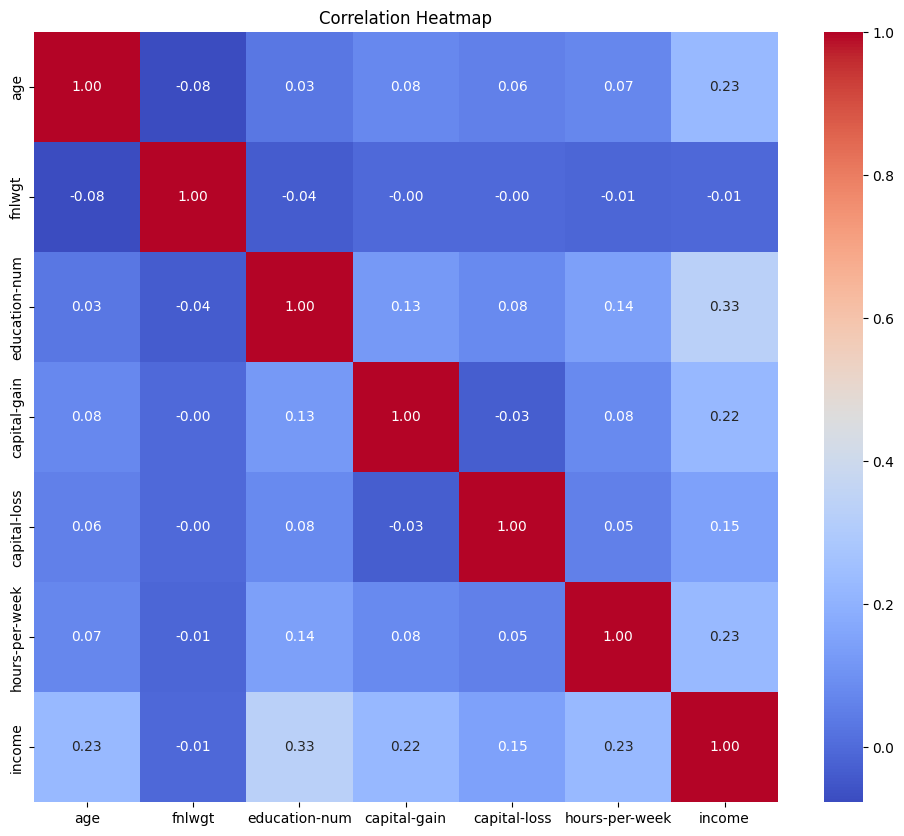

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### **Data Visualization**

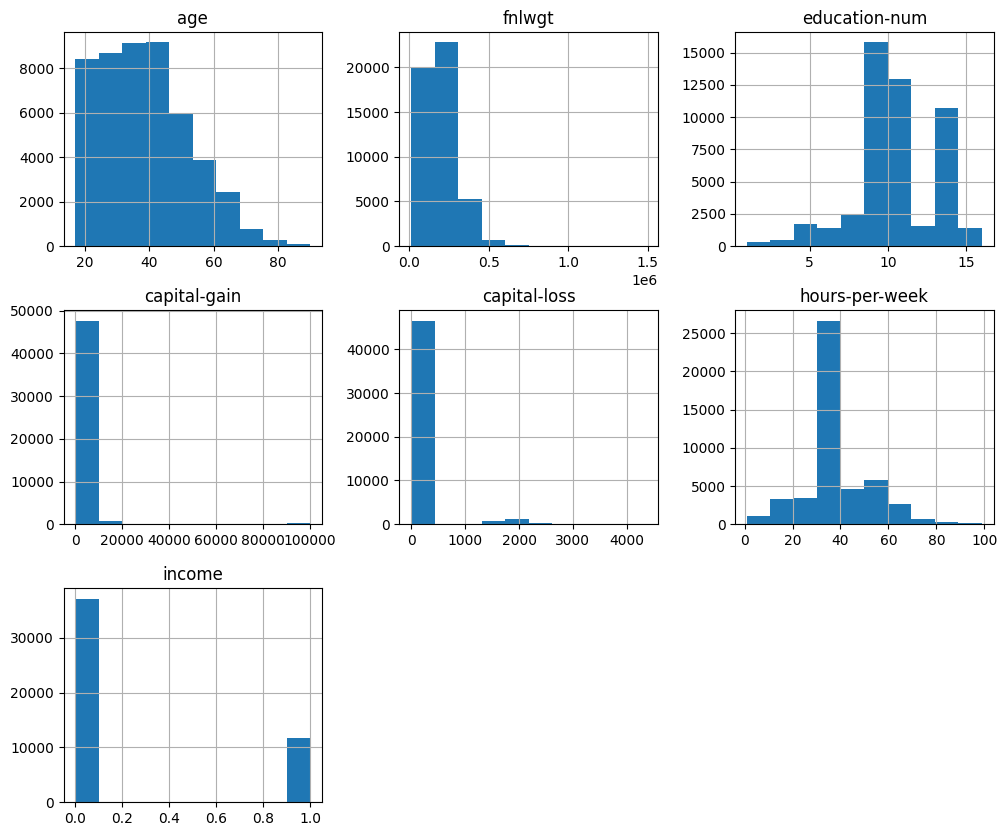

In [ ]:
# Histograms of numerical features
df.hist(figsize=(12, 10))
plt.show()

In [ ]:
# Pairplot to visualize relationships between numerical features
# sns.pairplot(df, hue='income', diag_kind="kde")
# plt.show()

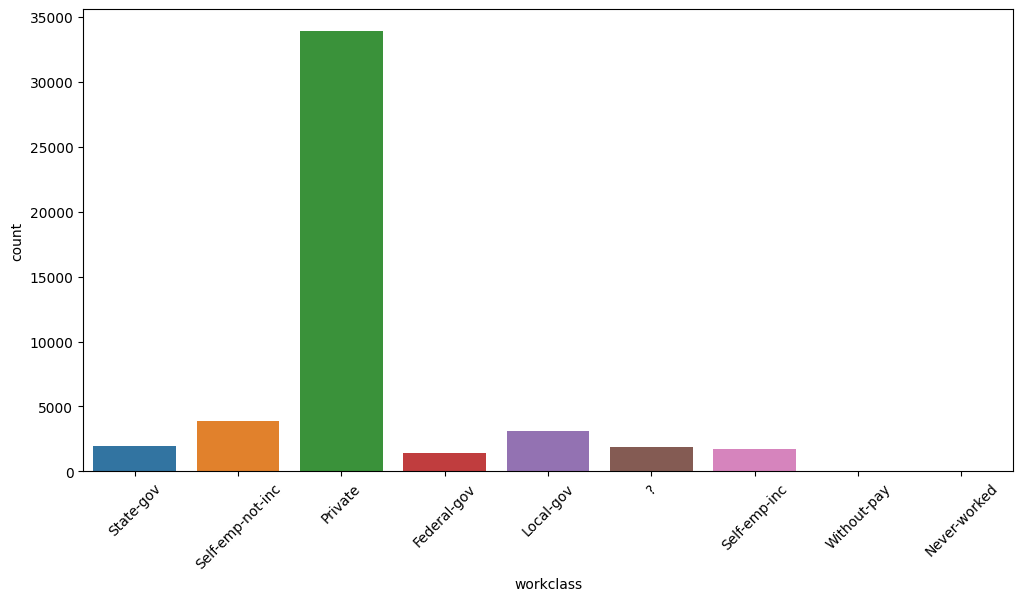

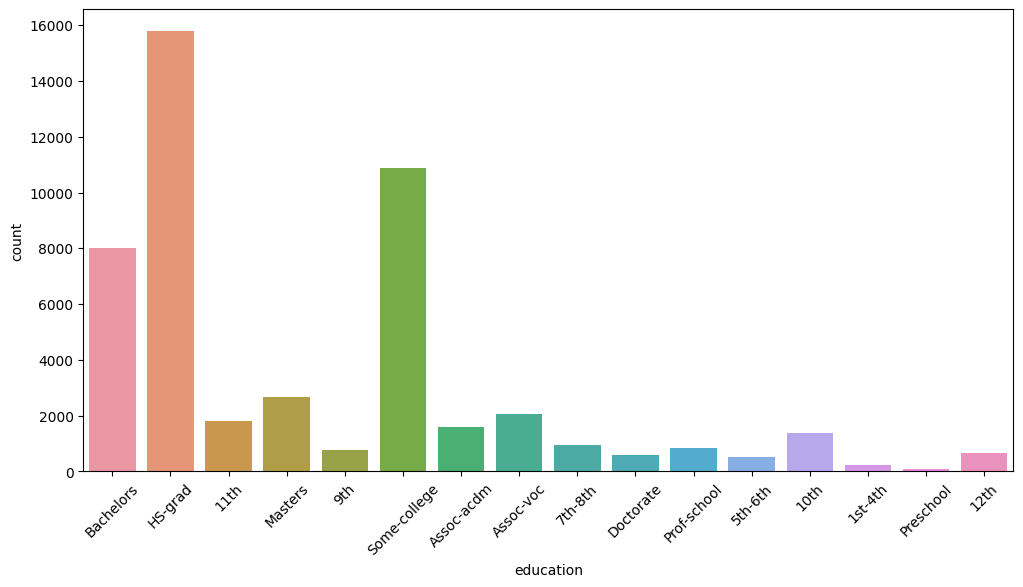

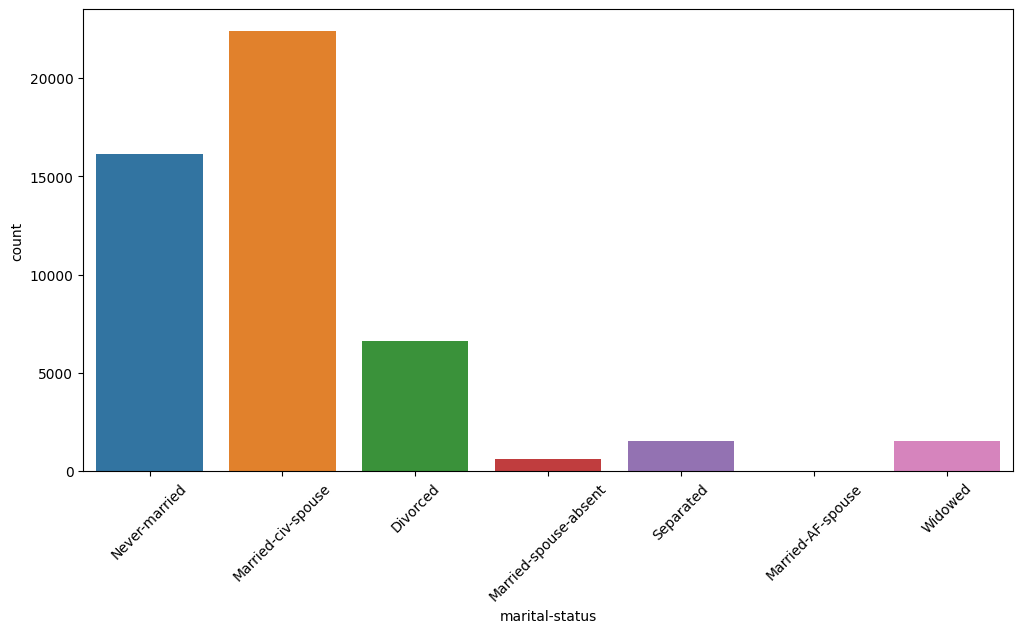

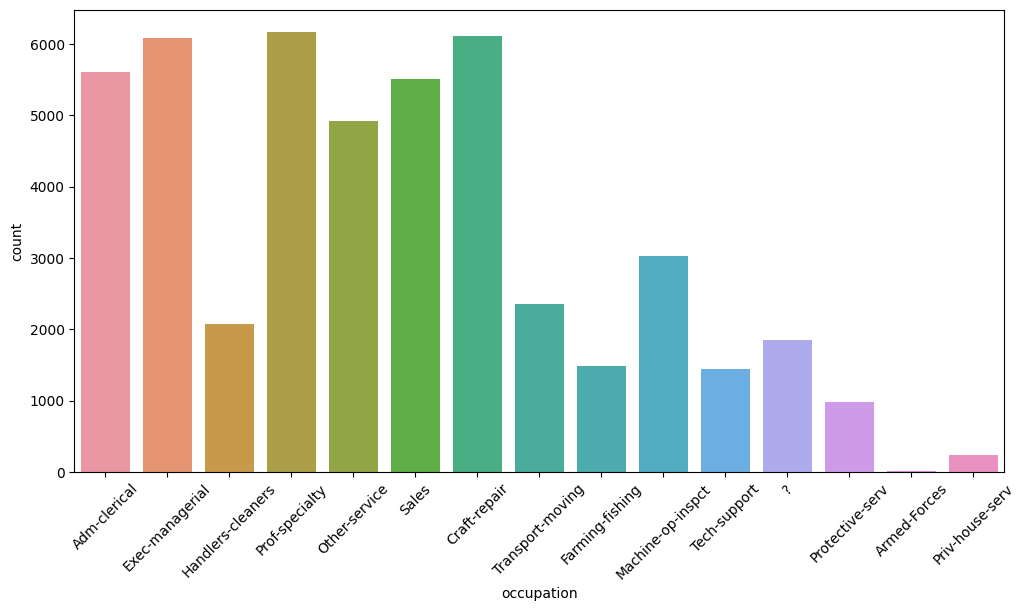

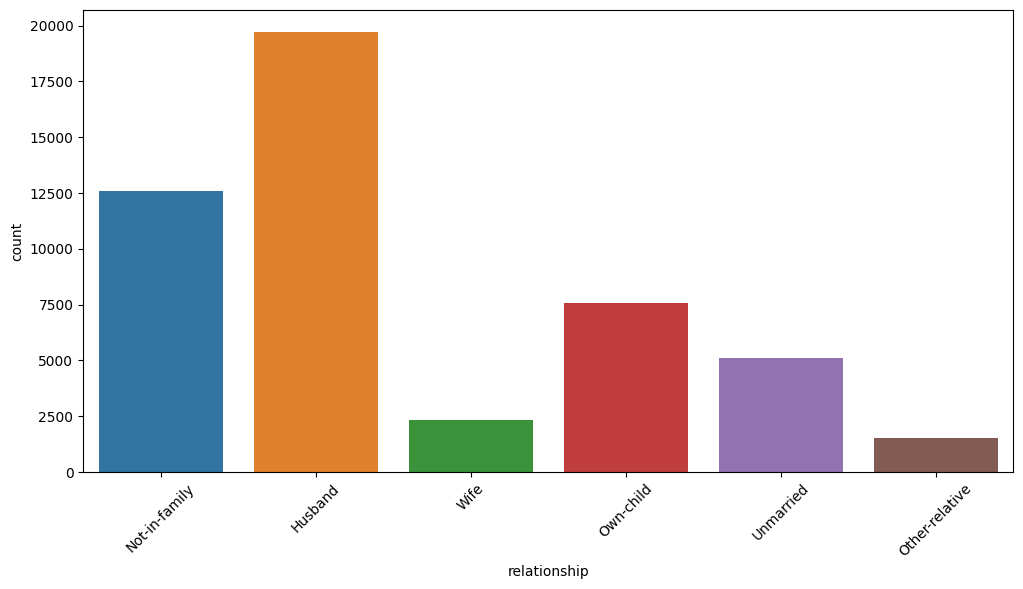

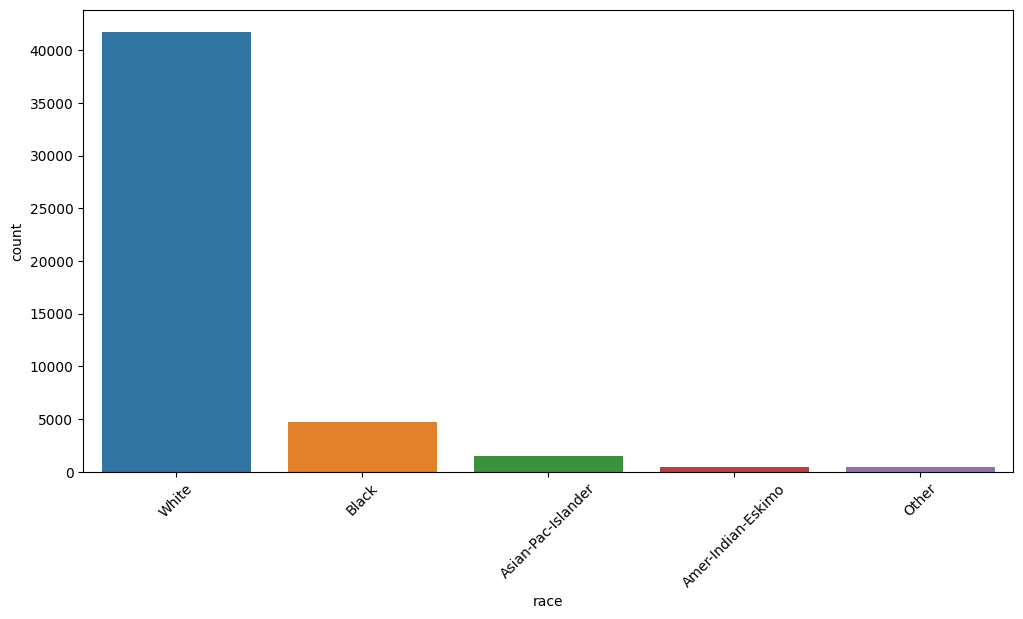

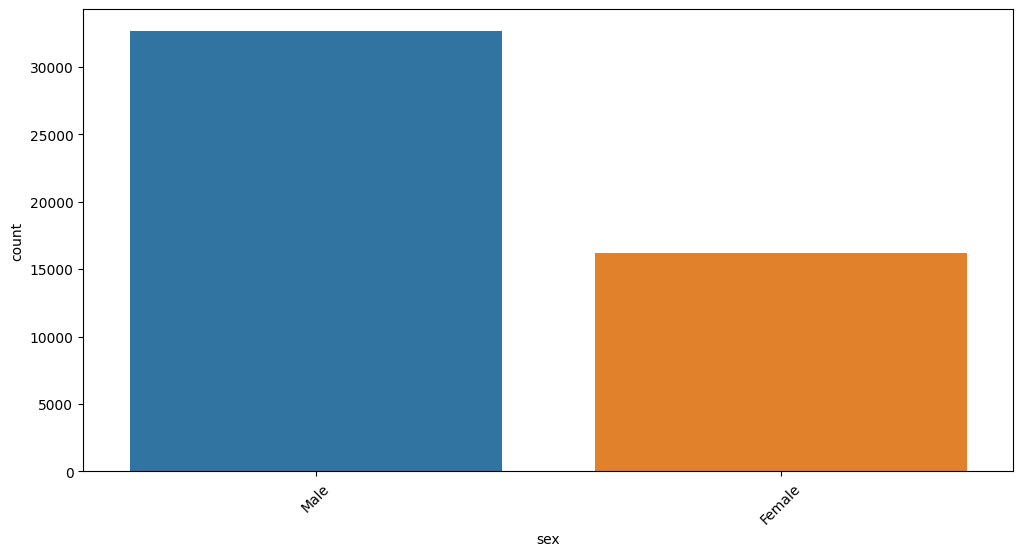

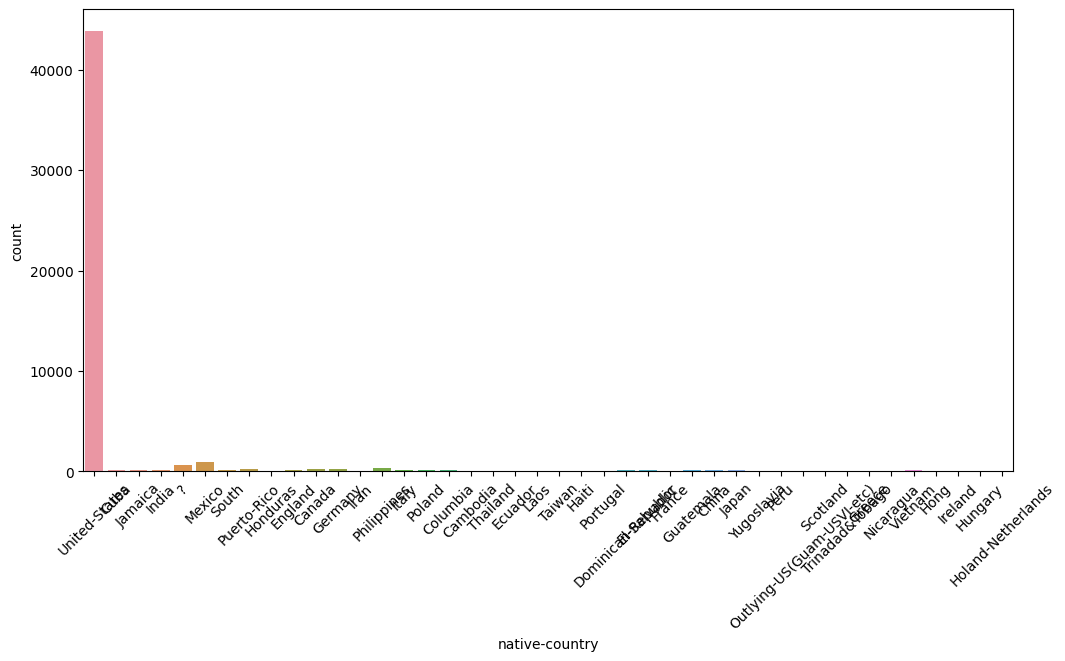

In [ ]:
# Countplot for categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=45)
    plt.show()

### **Dealing With Missing Values**

In [ ]:
# Check for missing values
missing_data = df.isnull().sum()
print(missing_data)

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [ ]:
#finding special characters
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [ ]:
# code will replace the special character to nan and then drop the columns
df['native-country'] = df['native-country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [ ]:
# Replace Missing Values with appropriate values
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)
df['occupation'].fillna("Other", inplace=True)

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### **Deal With Duplicates Values**

In [ ]:
# Find duplicate records
df.loc[df.duplicated() == True]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,0
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,0
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,0
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,0
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,0
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,0
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,0
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,0


In [ ]:
# The number of duplicates is insignificant so we can drop them.
df = df.drop_duplicates()
df.loc[df.duplicated() == True]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


# **Feature Engineering and Selection**

### **Initailize Preprocessing**

In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# Initialize StandardScaler
std = StandardScaler()

# Initialize MinMaxScaler
mms = MinMaxScaler()

In [ ]:
# Make a copy to preserve the original dataset
df1 = df.copy()

## **Label Encoding**

### **Age Attribute(Label Encoding)**

In [ ]:
print(df1['age'].describe())
df1.groupby('age').size()

count    48790.000000
mean        38.652798
std         13.708493
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


age
17     594
18     861
19    1045
20    1111
21    1092
      ... 
86       1
87       3
88       6
89       2
90      54
Length: 74, dtype: int64

In [ ]:
df1['age'].corr(df1['income'])

0.23014371760436517

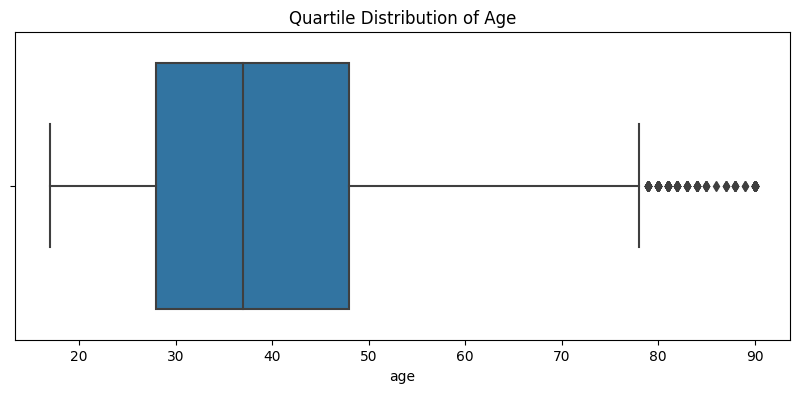

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['age'], data=df1)
plt.title('Quartile Distribution of Age')
plt.show()

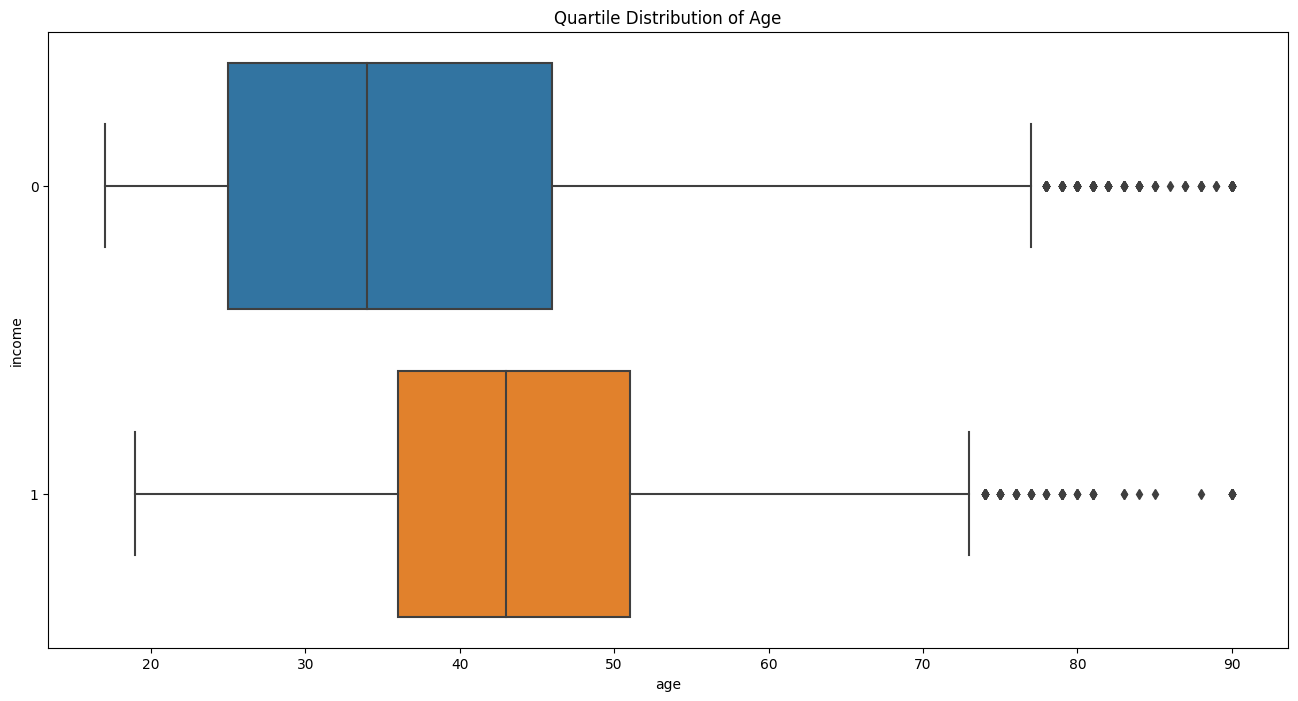

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=df1['age'], y=df1['income'].astype('category'), data=df1)
plt.title('Quartile Distribution of Age')
plt.show()

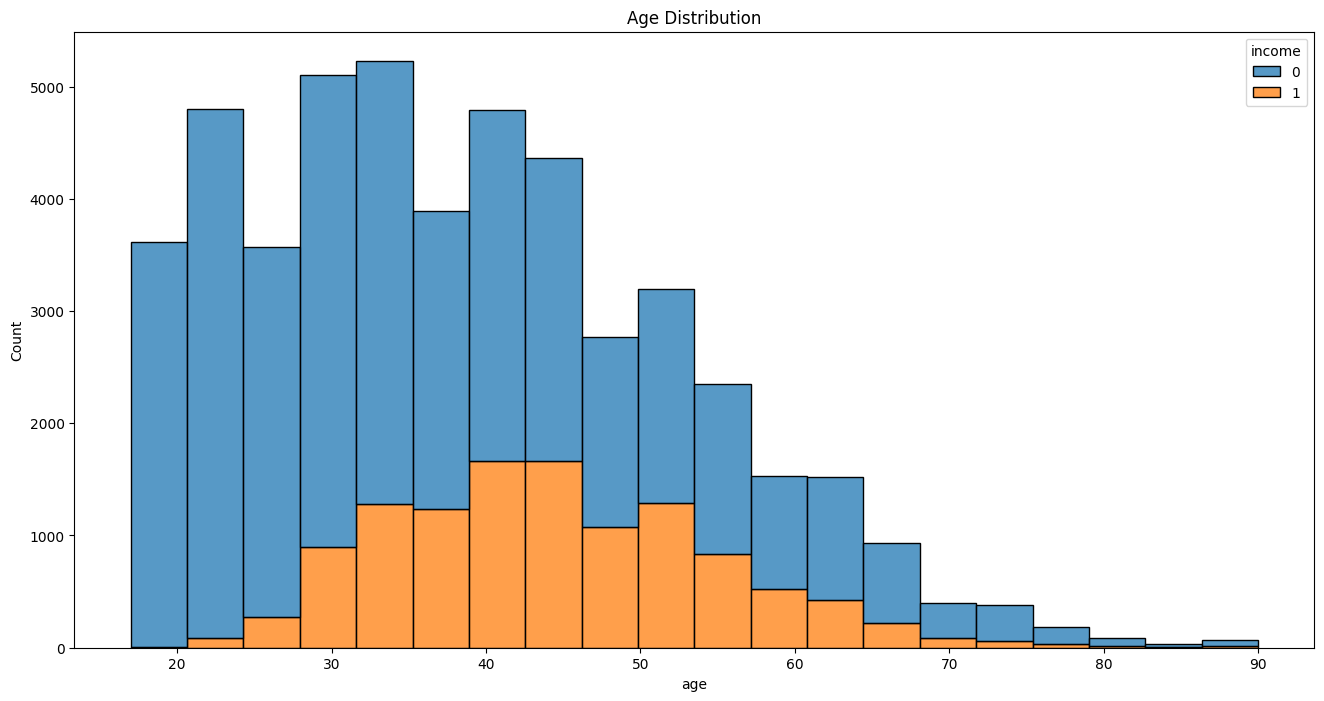

In [ ]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df1, x='age', hue='income', bins=20, multiple='stack')
plt.title('Age Distribution')
plt.show()

In [ ]:
# Create Quartile bins to covert age to categorical data
df1['age'] = pd.qcut(df1['age'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [ ]:
# We perform Label encoding to preserve ordinality
df1['age'] = le.fit_transform(df1['age'])
df1['age'] = df1['age'].astype(int)

In [ ]:
print(df1['age'].describe())
df1.groupby('age').size()

count    48790.000000
mean         1.453167
std          1.124106
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: age, dtype: float64


age
0    13262
1    11674
2    12336
3    11518
dtype: int64

In [ ]:
df1['age'].corr(df1['income'])

0.2681452112263657

### **Marital-status Attribute(Label Encoding)**

In [ ]:
print(df1['marital-status'].describe())
df1.groupby('marital-status').size()

count                  48790
unique                     7
top       Married-civ-spouse
freq                   22366
Name: marital-status, dtype: object


marital-status
Divorced                  6630
Married-AF-spouse           37
Married-civ-spouse       22366
Married-spouse-absent      627
Never-married            16082
Separated                 1530
Widowed                   1518
dtype: int64

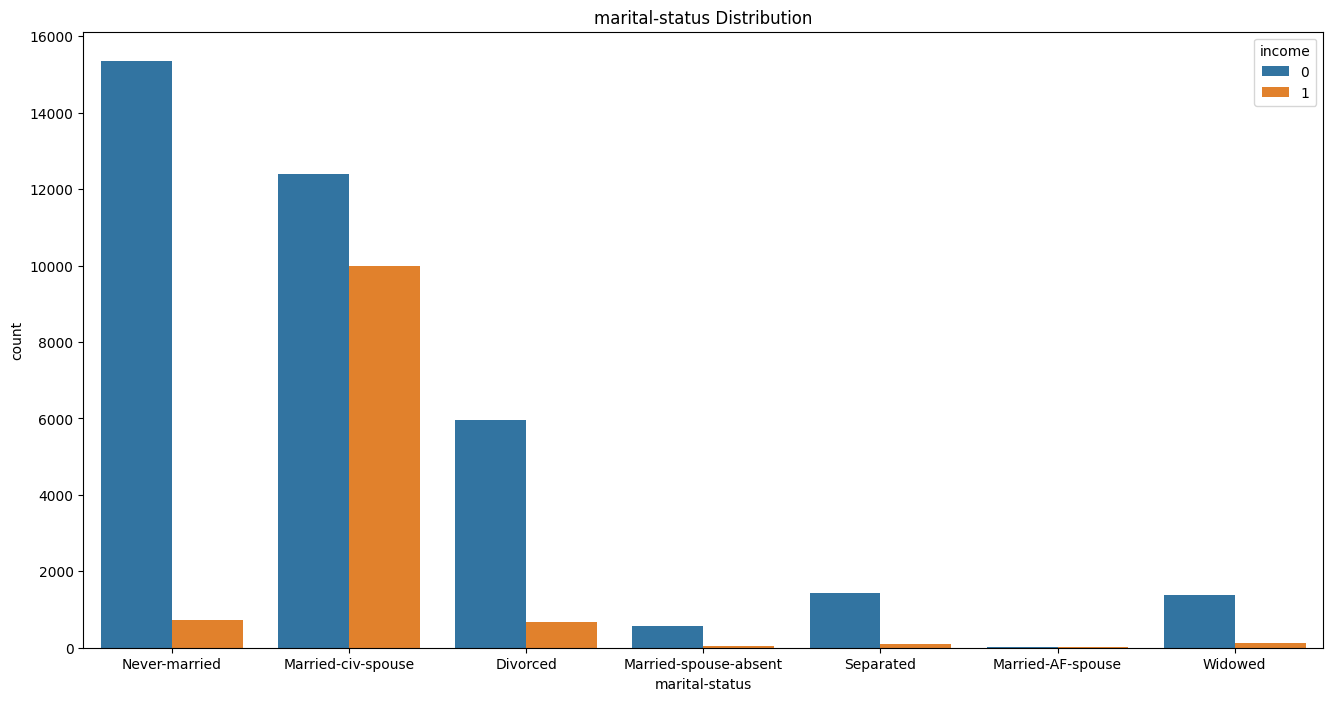

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df1, x='marital-status',hue='income')
plt.title('marital-status Distribution')
plt.show()

In [ ]:
# We perform Label encoding to preserve relatioship
df1['marital-status'] = le.fit_transform(df1['marital-status'])
df1['marital-status'] = df1['marital-status'].astype(int)
df1.groupby('marital-status').size()

marital-status
0     6630
1       37
2    22366
3      627
4    16082
5     1530
6     1518
dtype: int64

In [ ]:
df1['marital-status'].corr(df1['income'])

-0.19885460541939

### **Relationship Attribute(Label Encoding)**

In [ ]:
print(df1['relationship'].describe())
df1.groupby('relationship').size()

count       48790
unique          6
top       Husband
freq        19703
Name: relationship, dtype: object


relationship
Husband           19703
Not-in-family     12557
Other-relative     1506
Own-child          7569
Unmarried          5124
Wife               2331
dtype: int64

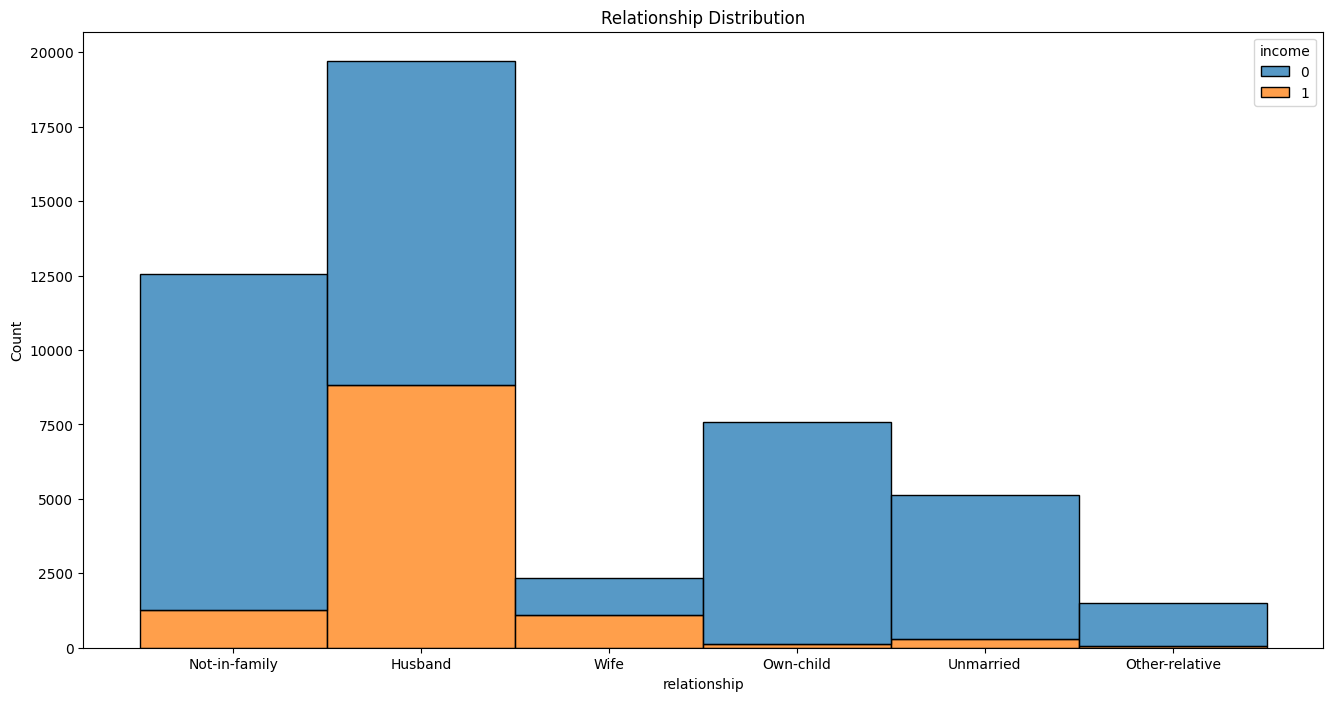

In [ ]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df1, x='relationship', hue='income', multiple='stack')
plt.title('Relationship Distribution')
plt.show()

In [ ]:
# We perform Label encoding to preserve ordinality
df1['relationship'] = le.fit_transform(df1['relationship'])
df1['relationship'] = df1['relationship'].astype(int)
df1.groupby('relationship').size()

relationship
0    19703
1    12557
2     1506
3     7569
4     5124
5     2331
dtype: int64

In [ ]:
df1['relationship'].corr(df1['income'])

-0.25317456797601934

### **Sex Attribute(Label Encoding)**

In [ ]:
print(df1['sex'].describe())
df1.groupby('sex').size()

count     48790
unique        2
top        Male
freq      32614
Name: sex, dtype: object


sex
Female    16176
Male      32614
dtype: int64

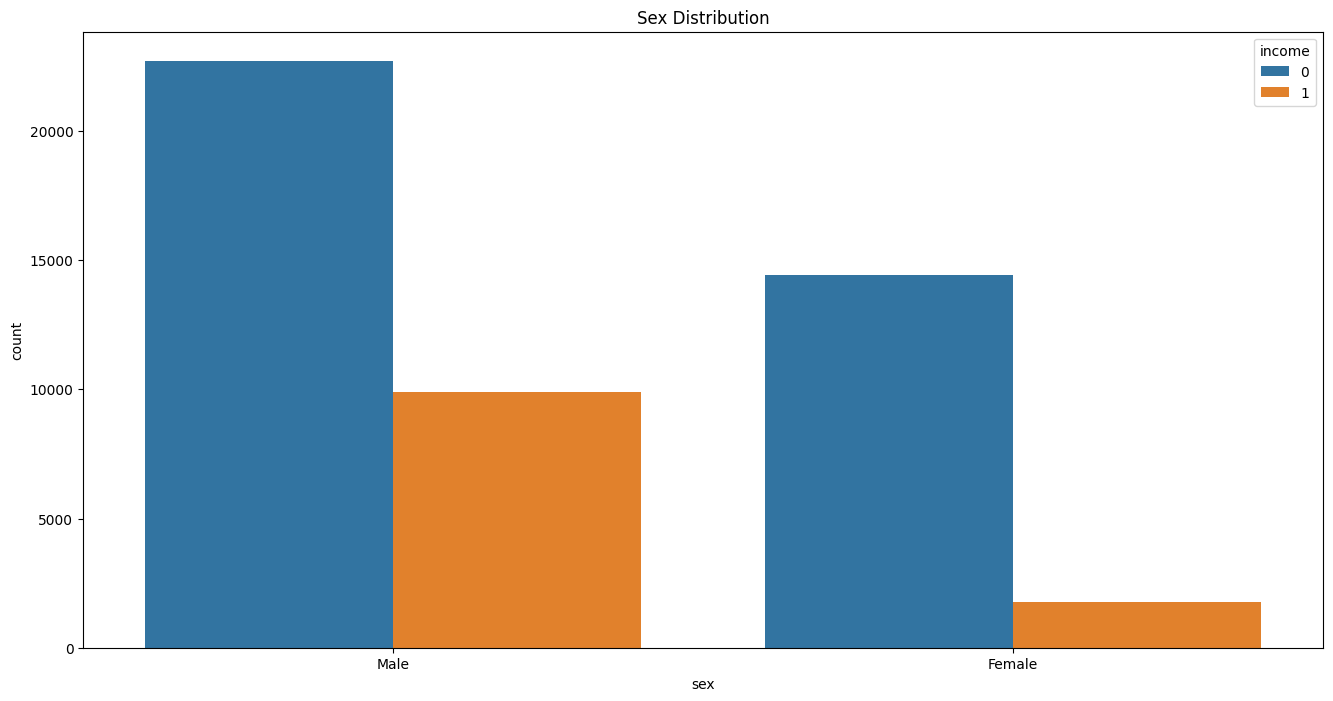

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df1, x='sex', hue='income')
plt.title('Sex Distribution')
plt.show()

In [ ]:
# We perform Label encoding to preserve ordinality
df1['sex'] = le.fit_transform(df1['sex'])
df1['sex'] = df1['sex'].astype(int)
df1.groupby('sex').size()

sex
0    16176
1    32614
dtype: int64

In [ ]:
df1['sex'].corr(df1['income'])

0.2146393426347253

In [ ]:
df1['education-num'].corr(df1['income'])

0.33280186784084337

## **Frequency Encoding**

### **Workclass Attribute(Frequency Encoding)**

In [ ]:
print(df1['workclass'].describe())
df1.groupby('workclass').size()

count       48790
unique          8
top       Private
freq        36655
Name: workclass, dtype: object


workclass
Federal-gov          1432
Local-gov            3136
Never-worked           10
Private             36655
Self-emp-inc         1694
Self-emp-not-inc     3861
State-gov            1981
Without-pay            21
dtype: int64

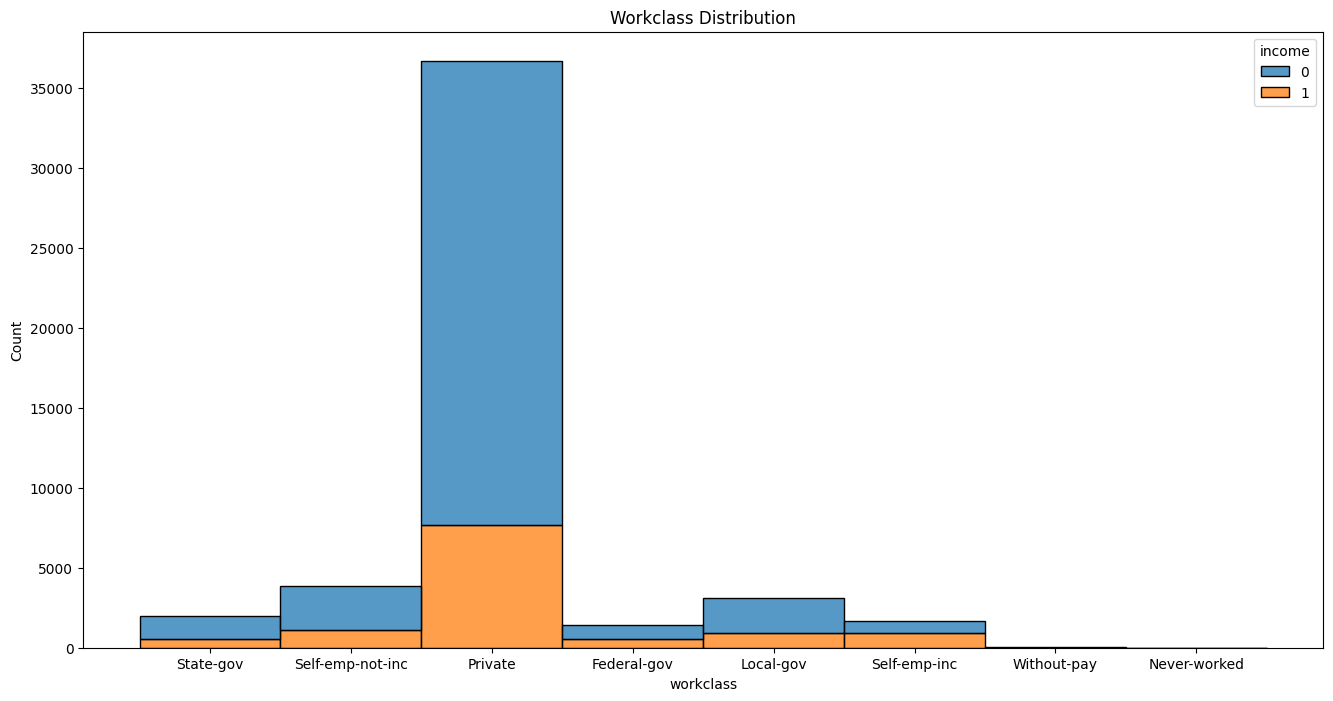

In [ ]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df1, x='workclass', hue='income', bins=20, multiple='stack')
plt.title('Workclass Distribution')
plt.show()

In [ ]:
# We perform frequency encoding on this as label encoding might introduce ordinality.


In [ ]:
#  Frequency Encoding for 'workclass':

workclass_frequency = df1['workclass'].value_counts(normalize=True).to_dict()

# Map the frequency encoding to the 'workclass' column
df1['workclass'] = df1['workclass'].map(workclass_frequency).astype(float)
print(df1['workclass'].describe())
df1.groupby('workclass').size()

count    48790.000000
mean         0.578533
std          0.300396
min          0.000205
25%          0.751281
50%          0.751281
75%          0.751281
max          0.751281
Name: workclass, dtype: float64


workclass
0.000205       10
0.000430       21
0.029350     1432
0.034720     1694
0.040603     1981
0.064275     3136
0.079135     3861
0.751281    36655
dtype: int64

In [ ]:
df1['workclass'].corr(df1['income']) #Fix this error

-0.12762381773554804

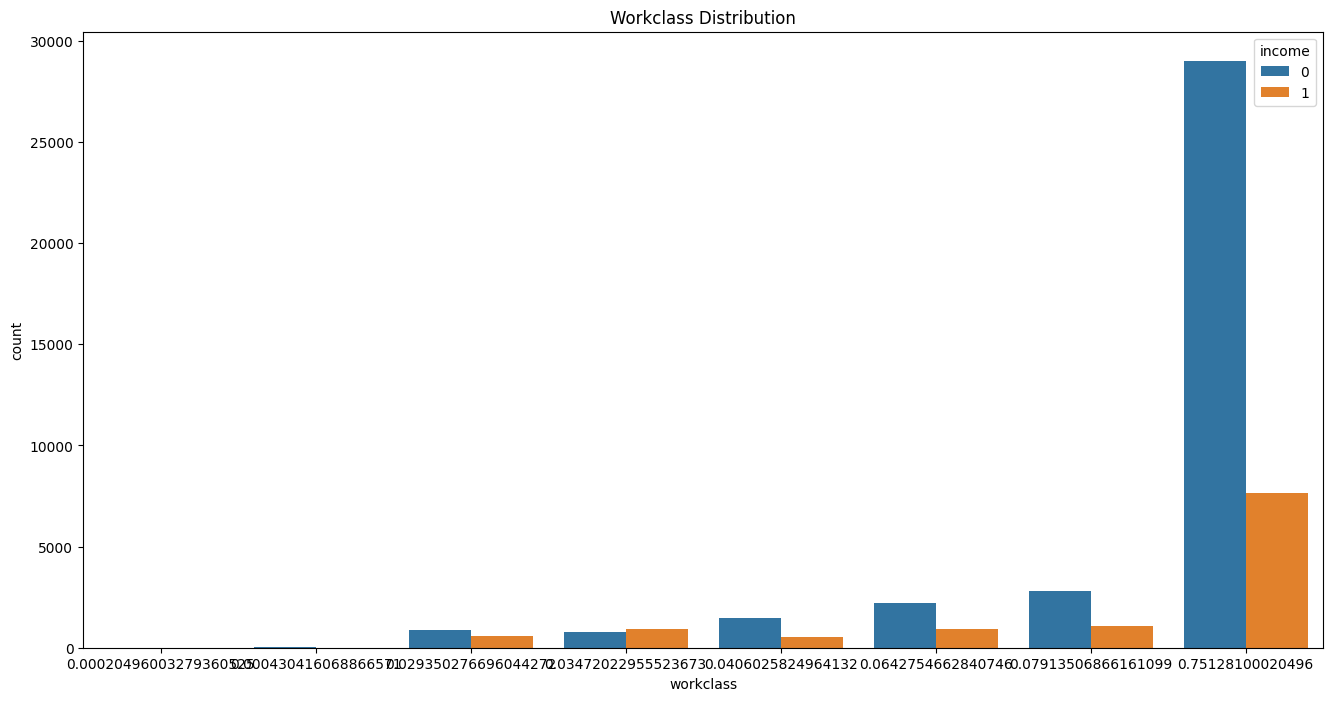

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df1, x='workclass', hue='income')
plt.title('Workclass Distribution')
plt.show()

### **Occupation Attribute(Frequency Encoding)**

In [ ]:
print(df1['occupation'].describe())
df.groupby('occupation').size()

count              48790
unique                15
top       Prof-specialty
freq                6165
Name: occupation, dtype: object


occupation
Adm-clerical         5606
Armed-Forces           15
Craft-repair         6102
Exec-managerial      6082
Farming-fishing      1485
Handlers-cleaners    2071
Machine-op-inspct    3017
Other                2805
Other-service        4919
Priv-house-serv       240
Prof-specialty       6165
Protective-serv       982
Sales                5501
Tech-support         1445
Transport-moving     2355
dtype: int64

Text(0.5, 1.0, 'Occupation Distribution')

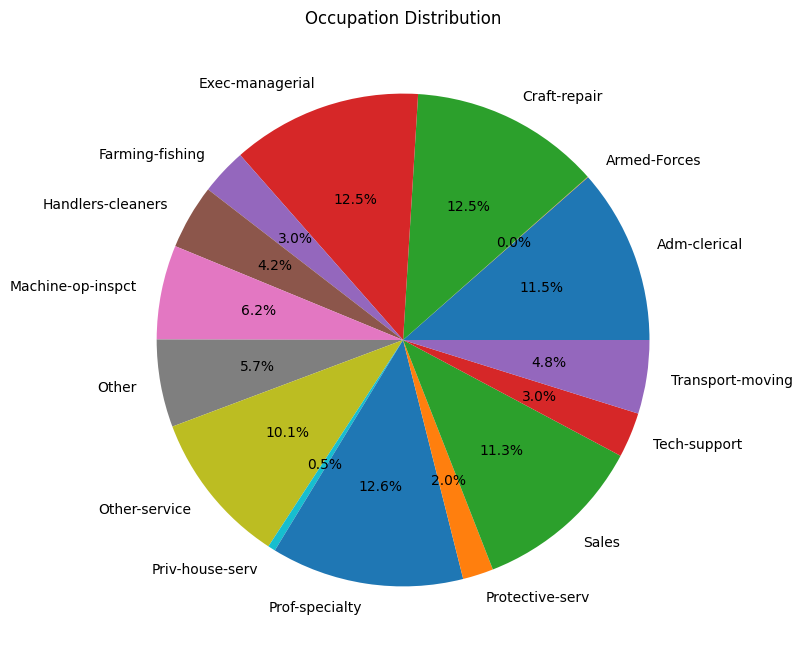

In [ ]:
plt.figure(figsize=(16, 8))
plt.pie(df1.groupby('occupation').size(), labels=df1.groupby('occupation').size().index, autopct='%1.1f%%')
plt.title('Occupation Distribution')

Text(0.5, 1.0, 'Occupation Distribution')

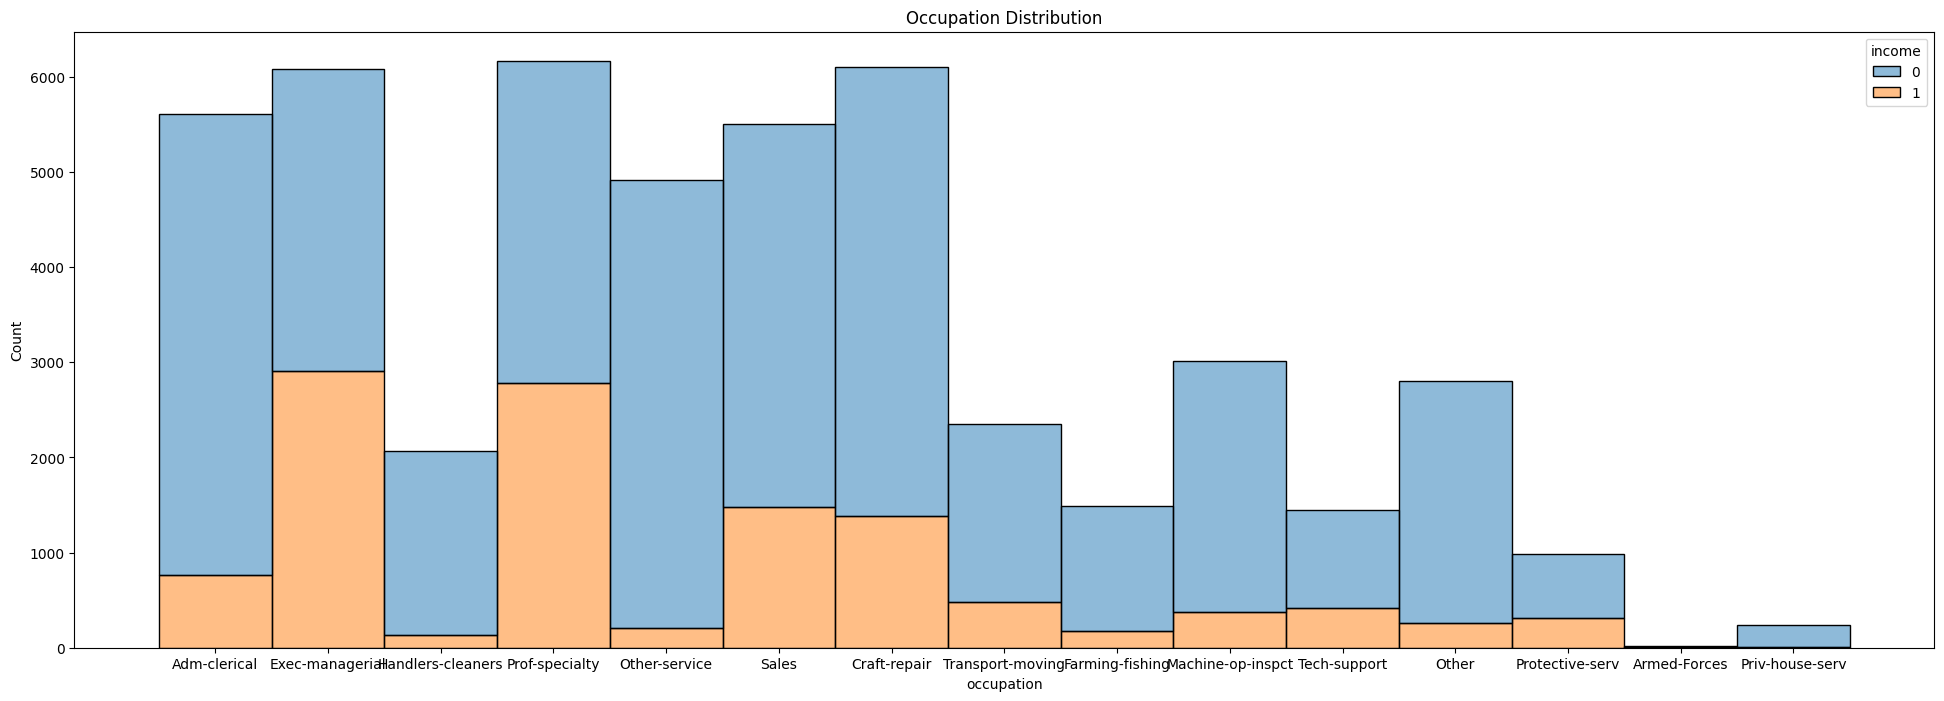

In [ ]:
plt.figure(figsize=(24, 8))
sns.histplot(data=df1, x='occupation', hue='income', multiple='stack', alpha=0.5)
plt.title('Occupation Distribution')

In [ ]:
#  Frequency Encoding for 'occupation':

occupation_frequency = df1['occupation'].value_counts(normalize=True).to_dict()

# Map the frequency encoding to the 'occupation' column
df1['occupation'] = df1['occupation'].map(occupation_frequency).astype(float)
print(df1['occupation'].describe())
df1.groupby('occupation').size()

count    48790.000000
mean         0.096720
std          0.034770
min          0.000307
25%          0.061836
50%          0.112749
75%          0.125067
max          0.126358
Name: occupation, dtype: float64


occupation
0.000307      15
0.004919     240
0.020127     982
0.029617    1445
0.030437    1485
0.042447    2071
0.048268    2355
0.057491    2805
0.061836    3017
0.100820    4919
0.112749    5501
0.114901    5606
0.124657    6082
0.125067    6102
0.126358    6165
dtype: int64

In [ ]:
df1['occupation'].corr(df1['income'])

0.17008293499649688

### **Race Attribute(Frequency Encoding)**

In [ ]:
print(df1['race'].describe())
df1.groupby('race').size()

count     48790
unique        5
top       White
freq      41714
Name: race, dtype: object


race
Amer-Indian-Eskimo      470
Asian-Pac-Islander     1517
Black                  4683
Other                   406
White                 41714
dtype: int64

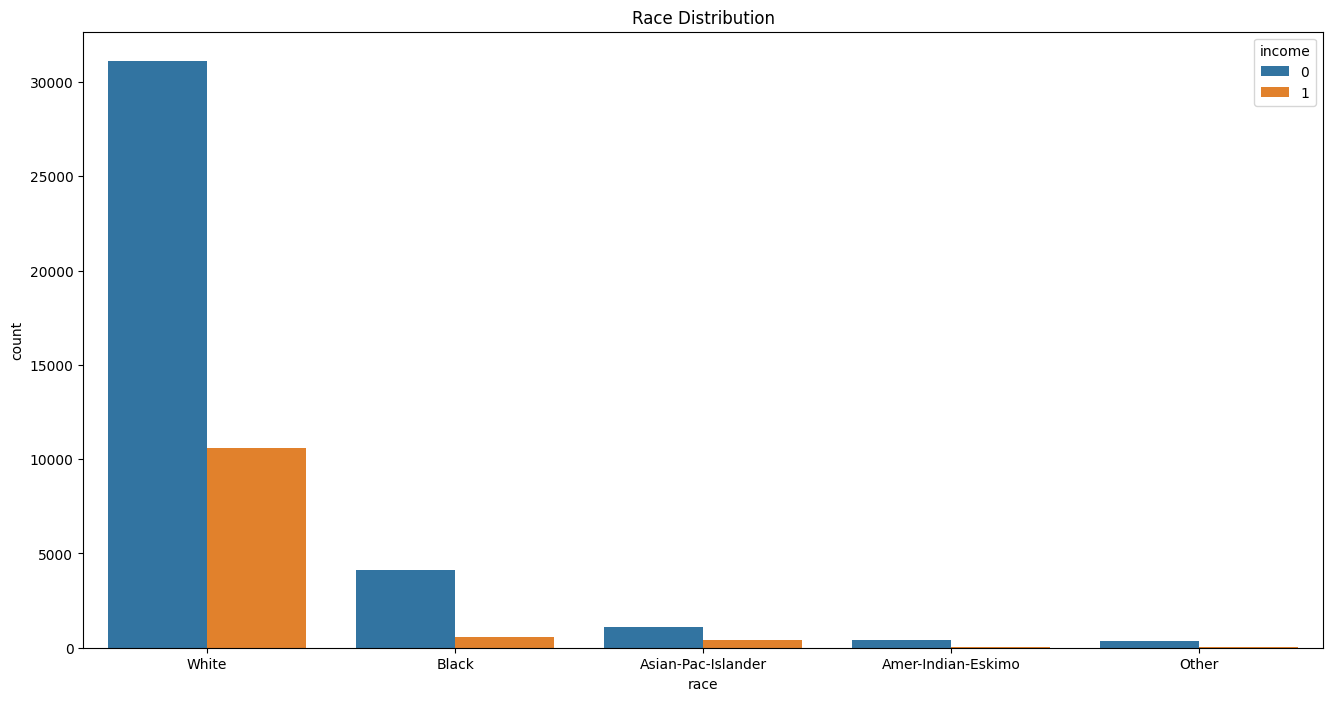

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df1, x='race', hue='income')
plt.title('Race Distribution')
plt.show()

In [ ]:
# We do frequency encoding cos there is no ordinality in races and we don't want to introduce any.
#  Frequency Encoding for 'race':

race_frequency = df1['race'].value_counts(normalize=True).to_dict()

# Map the frequency encoding to the 'race' column
df1['race'] = df1['race'].map(race_frequency).astype(float)
print(df1['race'].describe())
df1.groupby('race').size()

count    48790.000000
mean         0.741316
std          0.276278
min          0.008321
25%          0.854970
50%          0.854970
75%          0.854970
max          0.854970
Name: race, dtype: float64


race
0.008321      406
0.009633      470
0.031092     1517
0.095983     4683
0.854970    41714
dtype: int64

In [ ]:
df1['race'].corr(df1['income'])

0.08209622758729972

### **Native-Country Attribute(Frequency Encoding)**

In [ ]:
print(df1['native-country'].describe())
df1.groupby('native-country').size()

count             48790
unique               41
top       United-States
freq              44648
Name: native-country, dtype: object


native-country
Cambodia                         28
Canada                          182
China                           122
Columbia                         85
Cuba                            138
Dominican-Republic              103
Ecuador                          45
El-Salvador                     155
England                         127
France                           38
Germany                         206
Greece                           49
Guatemala                        86
Haiti                            75
Holand-Netherlands                1
Honduras                         20
Hong                             30
Hungary                          19
India                           151
Iran                             59
Ireland                          37
Italy                           105
Jamaica                         106
Japan                            92
Laos                             23
Mexico                          943
Nicaragua                        49
Outlying-US(G

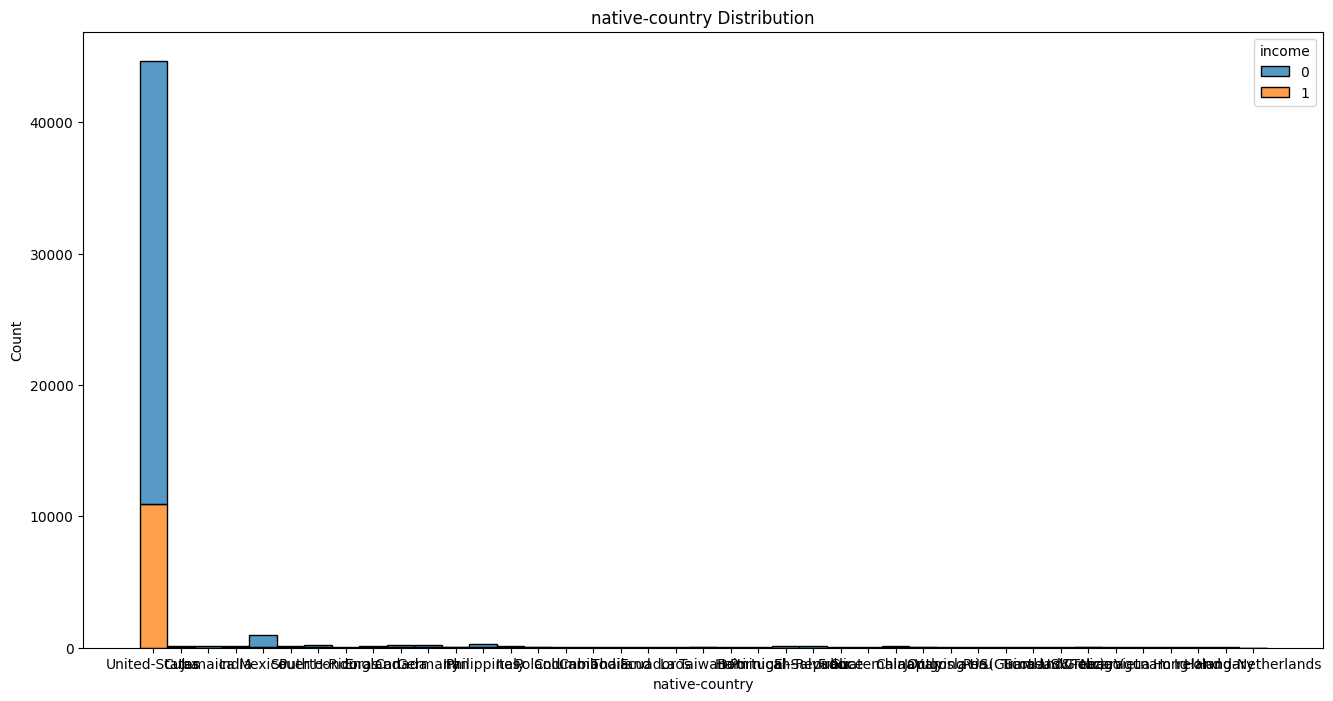

In [ ]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df1, x='native-country', hue='income', multiple='stack')
plt.title('native-country Distribution')
plt.show()

In [ ]:
#  Frequency Encoding for 'race':

country_frequency = df1['native-country'].value_counts(normalize=True).to_dict()

# Map the frequency encoding to the 'native-country' column
df1['native-country'] = df1['native-country'].map(country_frequency).astype(float)
print(df1['native-country'].describe())
df1.groupby('native-country').size()

count    48790.000000
mean         0.837965
std          0.253278
min          0.000020
25%          0.915106
50%          0.915106
75%          0.915106
max          0.915106
Name: native-country, dtype: float64


native-country
0.000020        1
0.000389       19
0.000410       20
0.000430       21
0.000471       69
0.000553       27
0.000574       28
0.000615       60
0.000758       37
0.000779       38
0.000922       45
0.000943       46
0.001004       98
0.001209       59
0.001332       65
0.001373       67
0.001537       75
0.001742       85
0.001763      172
0.001783       87
0.001886       92
0.002111      103
0.002152      105
0.002173      106
0.002357      115
0.002501      122
0.002603      127
0.002828      138
0.003095      151
0.003177      155
0.003730      182
0.003771      184
0.004222      206
0.006026      294
0.019328      943
0.915106    44648
dtype: int64

In [ ]:
# Binary encoding gives correlation of 0.0323
df1['native-country'].corr(df1['income'])

0.03729405741221725

In [ ]:
df1.dtypes

age                 int64
workclass         float64
fnlwgt              int64
education          object
education-num       int64
marital-status      int64
occupation        float64
relationship        int64
race              float64
sex                 int64
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country    float64
income              int64
dtype: object

## **MinMax Scaler**

### **fnlwgt Attribute(MinMax Scaler)**

In [ ]:
print(df1['fnlwgt'].describe())
df1.groupby('fnlwgt').size()

count    4.879000e+04
mean     1.896690e+05
std      1.056172e+05
min      1.228500e+04
25%      1.175550e+05
50%      1.781385e+05
75%      2.376062e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64


fnlwgt
12285      1
13492      1
13769      3
13862      1
14878      1
          ..
1268339    1
1366120    1
1455435    1
1484705    1
1490400    1
Length: 28523, dtype: int64

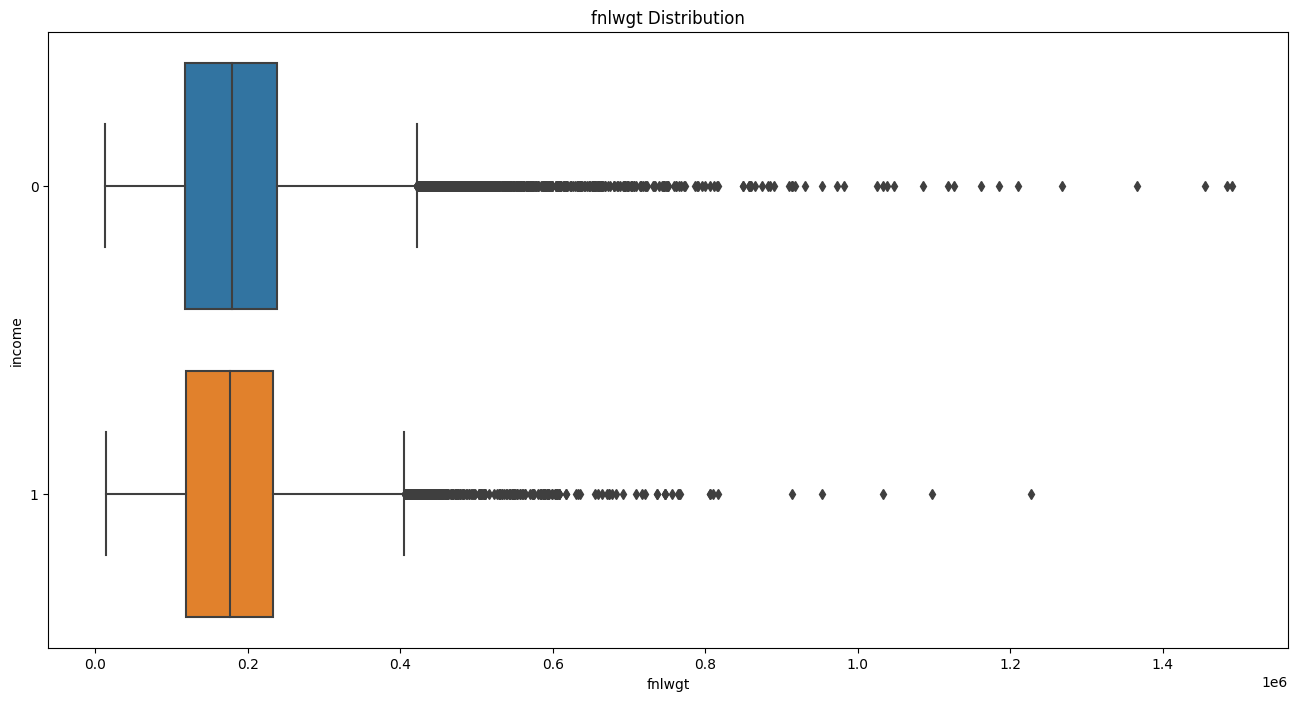

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df1, x='fnlwgt', y=df1['income'].astype('category'))
plt.title('fnlwgt Distribution')
plt.show()

In [ ]:
df1['fnlwgt'].corr(df1['income'])

-0.006308960973416982

In [ ]:
df1['fnlwgt'] = mms.fit_transform(df[['fnlwgt']])
print(df1['fnlwgt'].describe())
df1.groupby('fnlwgt').size()

count    48790.000000
mean         0.120007
std          0.071454
min          0.000000
25%          0.071219
50%          0.112206
75%          0.152438
max          1.000000
Name: fnlwgt, dtype: float64


fnlwgt
0.000000    1
0.000817    1
0.001004    3
0.001067    1
0.001754    1
           ..
0.849767    1
0.915920    1
0.976345    1
0.996147    1
1.000000    1
Length: 28523, dtype: int64

## **Standard Scaler**

### **Capital-Gain Attribute**

In [ ]:
print(df1['capital-gain'].describe())
df1.groupby('capital-gain').size()

count    48790.000000
mean      1080.217688
std       7455.905921
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


capital-gain
0        44755
114          8
401          5
594         52
914         10
         ...  
25236       14
27828       58
34095        6
41310        3
99999      244
Length: 123, dtype: int64

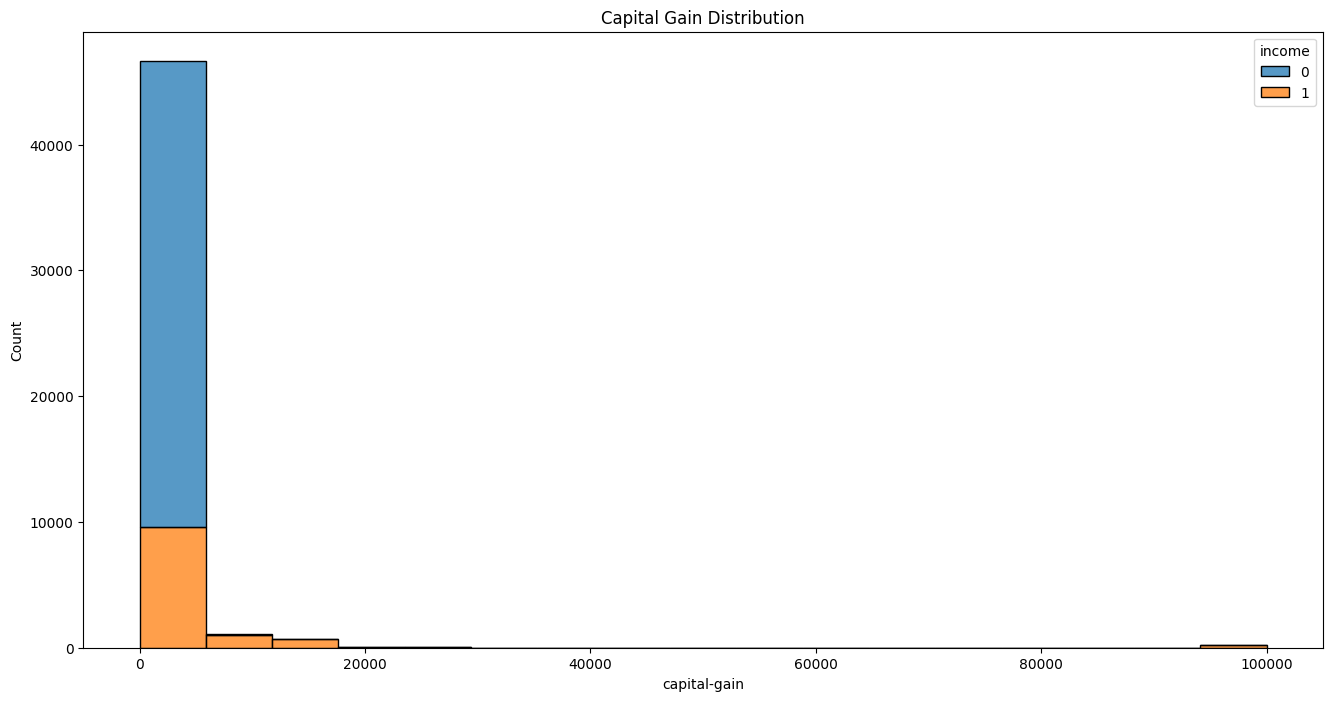

In [ ]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df1, x='capital-gain', hue='income', multiple='stack')
plt.title('Capital Gain Distribution')
plt.show()

In [ ]:
# Standard Scaler Transform
df1['capital-gain'] = std.fit_transform(df[['capital-gain']])

In [ ]:
df1['capital-gain'].corr(df1['income'])

0.22304731213351275

### **Capital-Loss Attribute**

In [ ]:
print(df1['capital-loss'].describe())
df1.groupby('capital-loss').size()

count    48790.000000
mean        87.595573
std        403.209129
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


capital-loss
0       46508
155         1
213         5
323         5
419         3
        ...  
3175        2
3683        2
3770        4
3900        2
4356        3
Length: 99, dtype: int64

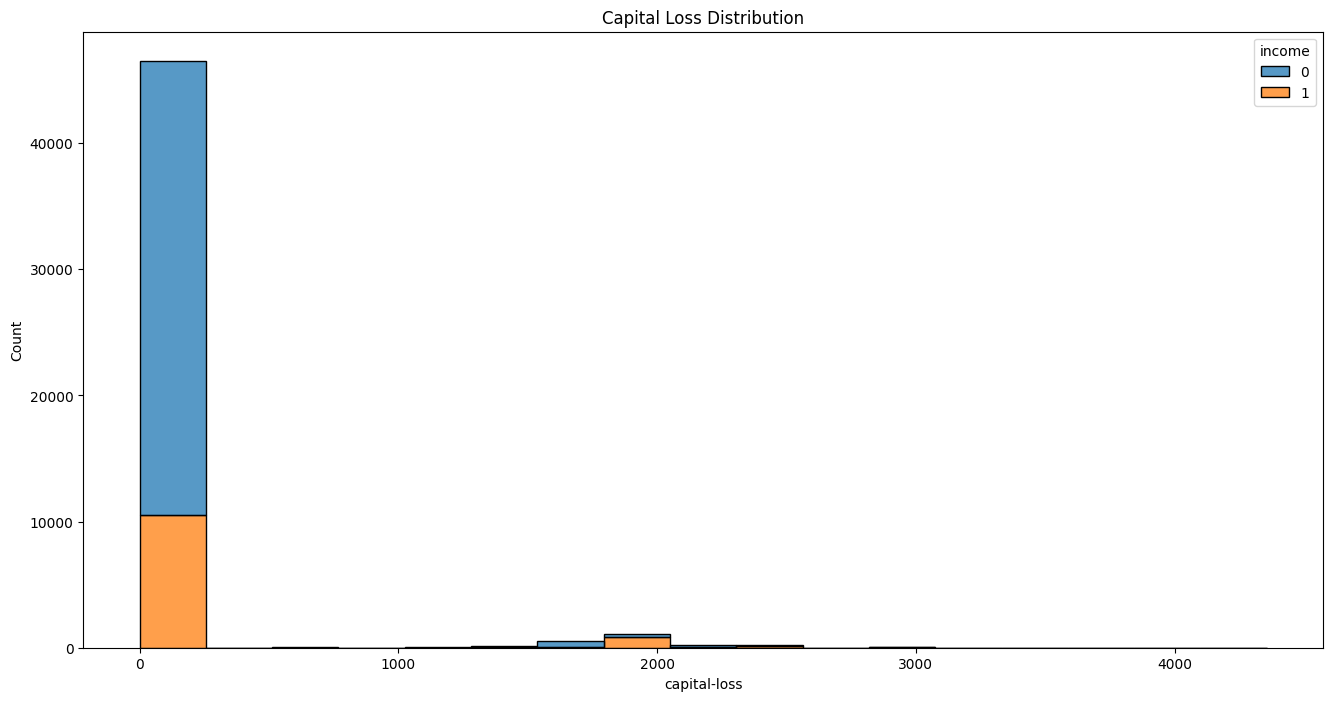

In [ ]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df1, x='capital-loss', hue='income', multiple='stack')
plt.title('Capital Loss Distribution')
plt.show()

In [ ]:
# Standard Scaler Transform
df1['capital-loss'] = std.fit_transform(df[['capital-loss']])

In [ ]:
df1['capital-loss'].corr(df1['income'])

0.14754167267165544

### **Hours-Per-Week Attribute**

In [ ]:
print(df1['hours-per-week'].describe())
df1.groupby('hours-per-week').size()

count    48790.000000
mean        40.425886
std         12.392729
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


hours-per-week
1      27
2      53
3      59
4      84
5      95
     ... 
95      2
96      9
97      2
98     14
99    137
Length: 96, dtype: int64

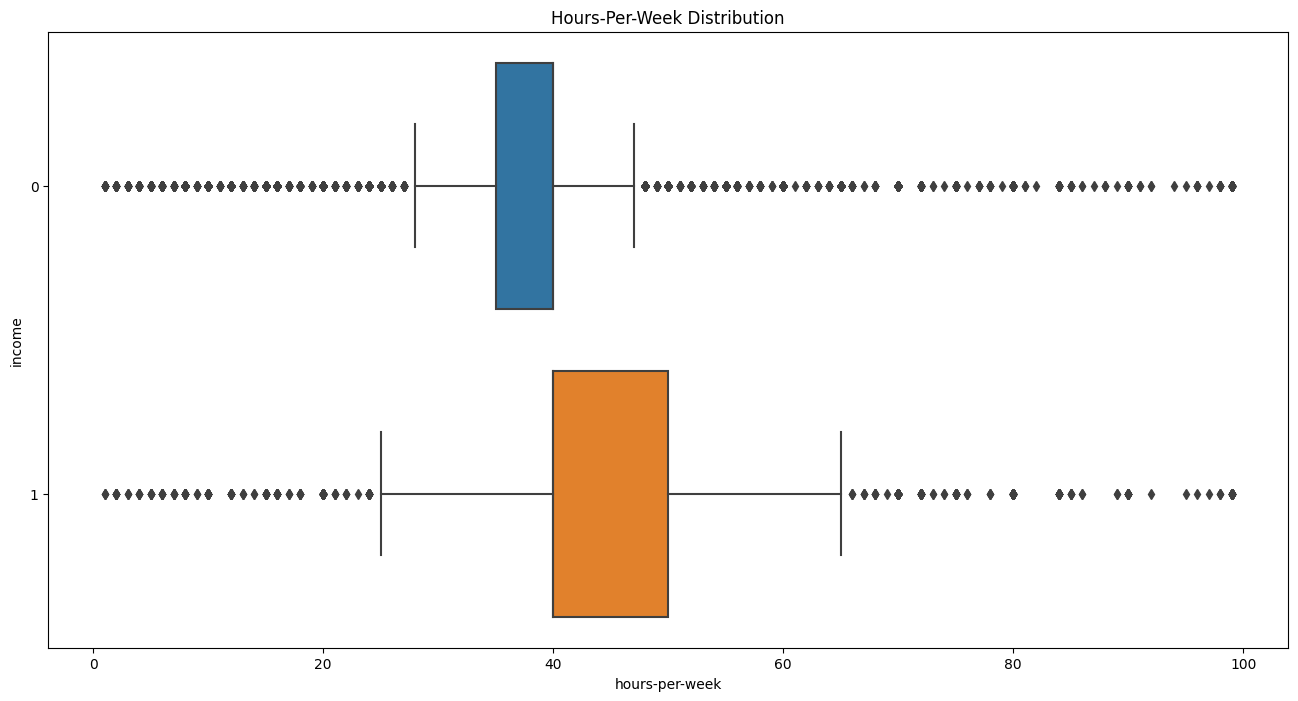

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df1, x='hours-per-week', y=df1['income'].astype('category'))
plt.title('Hours-Per-Week Distribution')
plt.show()

In [ ]:
# Standard Scaler Transform
df1['hours-per-week'] = std.fit_transform(df[['hours-per-week']])

In [ ]:
df1['hours-per-week'].corr(df1['income'])

0.22766351292595544

In [ ]:
# For capital-gain, capital-loss, hours-per-week if we do bins for categories we get a significantly lower correlation. So i feel standard scaler is much better.

### **Education and Education-num Attribute**

In [ ]:
# We drop Education as decided
df1 = df1.drop('education', axis=1)
df1.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,2,0.040603,0.044131,13,4,0.114901,1,0.854970,1,0.146702,-0.217248,-0.034366,0.915106,0
1,3,0.079135,0.048052,13,2,0.124657,0,0.854970,1,-0.144882,-0.217248,-2.213085,0.915106,0
2,2,0.751281,0.137581,9,0,0.042447,1,0.854970,1,-0.144882,-0.217248,-0.034366,0.915106,0
3,3,0.751281,0.150486,7,2,0.042447,0,0.095983,1,-0.144882,-0.217248,-0.034366,0.915106,0
4,0,0.751281,0.220635,13,2,0.126358,5,0.095983,0,-0.144882,-0.217248,-0.034366,0.002828,0


In [ ]:
print(df1['education-num'].describe())
df1.groupby('education-num').size()

count    48790.000000
mean        10.078807
std          2.570046
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64


education-num
1        81
2       245
3       507
4       954
5       756
6      1389
7      1812
8       655
9     15770
10    10863
11     2060
12     1601
13     8013
14     2656
15      834
16      594
dtype: int64

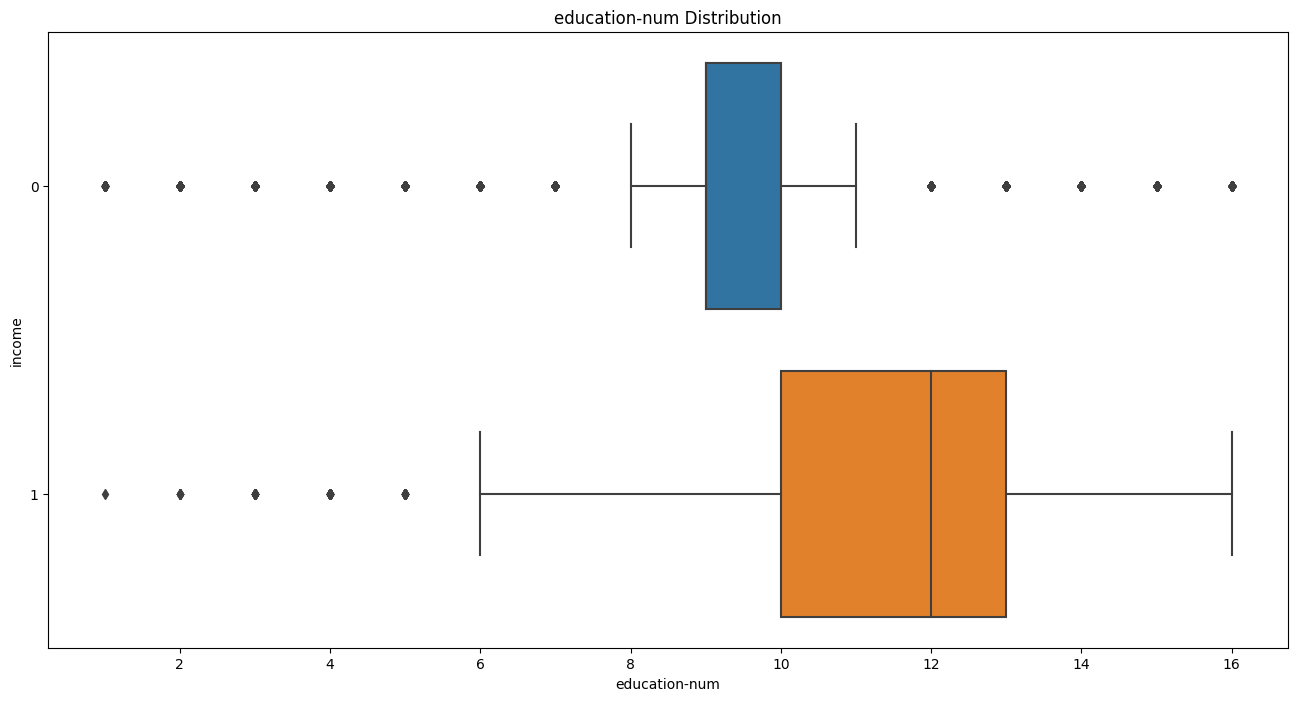

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df1, x='education-num', y=df1['income'].astype('category'))
plt.title('education-num Distribution')
plt.show()

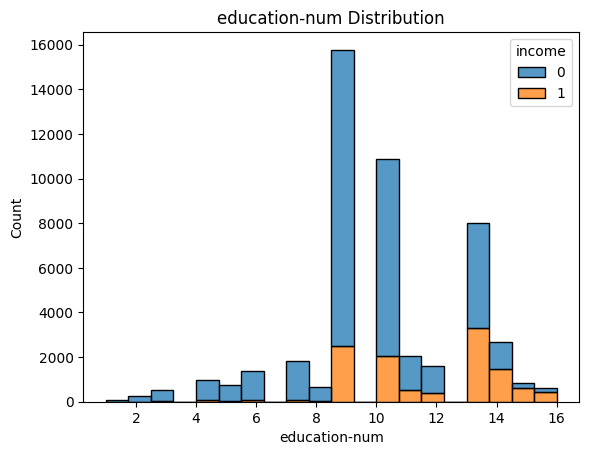

In [ ]:
sns.histplot(data=df1, x='education-num', hue='income', bins=20, multiple='stack')
plt.title('education-num Distribution')
plt.show()

## **Data Splitting**

In [ ]:
# DF for decision Tree
df2 = df1

In [ ]:
X = df1.drop('income', axis=1).astype('float32')
y = df1['income'].astype('float32')

In [ ]:
# Split the data into 70% train and 30% temporary
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Split the temporary data into 50% test and 50% validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [ ]:
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, X_val: {X_val.shape}')
print(f'y_train: {y_train.shape}, y_test: {y_test.shape}, y_val: {y_val.shape}')

X_train: (34153, 13), X_test: (7318, 13), X_val: (7319, 13)
y_train: (34153,), y_test: (7318,), y_val: (7319,)


In [ ]:
print(X_train.describe())
print(X_train.info())
print(X_train.shape)

                age     workclass        fnlwgt  education-num  \
count  34153.000000  34153.000000  34153.000000   34153.000000   
mean       1.450824      0.577634      0.120023      10.074722   
std        1.122812      0.300911      0.071667       2.565215   
min        0.000000      0.000205      0.000000       1.000000   
25%        0.000000      0.079135      0.071201       9.000000   
50%        1.000000      0.751281      0.112048      10.000000   
75%        2.000000      0.751281      0.152615      12.000000   
max        3.000000      0.751281      1.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    34153.000000  34153.000000  34153.000000  34153.000000  34153.000000   
mean         2.617398      0.096639      1.440020      0.741148      0.670746   
std          1.505529      0.034817      1.600844      0.276465      0.469949   
min          0.000000      0.000307      0.000000      0.008321      0.000000   


In [ ]:
print(y_train.describe())
print(y_train.info())

count    34153.000000
mean         0.239423
std          0.426737
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64
<class 'pandas.core.series.Series'>
Int64Index: 34153 entries, 35281 to 20259
Series name: income
Non-Null Count  Dtype  
--------------  -----  
34153 non-null  float32
dtypes: float32(1)
memory usage: 400.2 KB
None


# **Models**

## **Random Forest Classifier**

### **In-Built Model**

#### **Build Initial Model**

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_train,y_train)
predictions_rf =rf_model.predict(X_test)

#### **Make Predictions and Evaluate Model**

In [ ]:
precision_rf = precision_score(y_test, predictions_rf)
recall_rf = recall_score(y_test, predictions_rf)
accuracy_rf = accuracy_score(y_test, predictions_rf)
f1_rf = f1_score(y_test, predictions_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

In [ ]:
# Print the performance metrics on the test set
print("Test Set Metrics:")
print("Precision: {:.4f}".format(precision_rf))
print("Recall: {:.4f}".format(recall_rf))
print("Accuracy: {:.4f}".format(accuracy_rf))
print("F1-Score: {:.4f}".format(f1_rf))
print("ROC-AUC: {:.4f}".format(roc_auc_rf))

Test Set Metrics:
Precision: 0.7175
Recall: 0.6364
Accuracy: 0.8530
F1-Score: 0.6745
ROC-AUC: 0.8996


In [ ]:
feature_importances = list(zip(X_train, rf_model.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: fnlwgt                              Importance: 0.24178301188402748
Feature: capital-gain                        Importance: 0.11829497414341145
Feature: education-num                       Importance: 0.11553441444770624
Feature: relationship                        Importance: 0.10450785351081167
Feature: hours-per-week                      Importance: 0.09273275755921512
Feature: occupation                          Importance: 0.08684240604621371
Feature: marital-status                      Importance: 0.06668358370605021
Feature: age                                 Importance: 0.058066318843602936
Feature: workclass                           Importance: 0.037056840713637705
Feature: capital-loss                        Importance: 0.03607594319648753
Feature: native-country                      Importance: 0.01626497693941629
Feature: race                                Importance: 0.015333398935042281
Feature: sex                                 Importance: 0.01082352007437

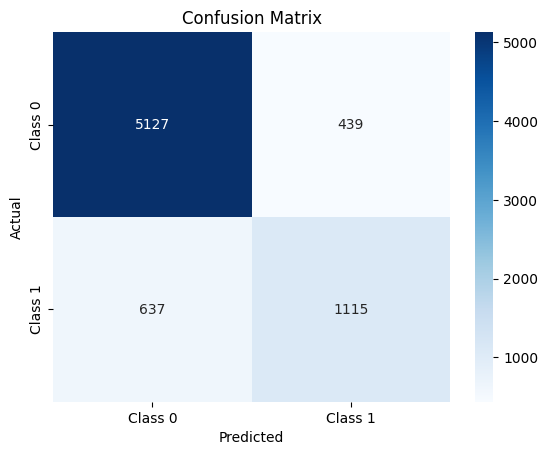

In [ ]:
# Calculate confusion matrix to get class-based accuracy
conf_matrix = confusion_matrix(y_test, predictions_rf)
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
class_labels = ['Class 0', 'Class 1']

# Create a Seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print("Class-Based Accuracy:")
for i, acc in enumerate(class_accuracy):
    print(f"Class {i}: {acc:.4f}")

Class-Based Accuracy:
Class 0: 0.9211
Class 1: 0.6364


In [ ]:
cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy')
mean_cv_auc = np.mean(cv_scores)

print("Cross-Validation accuracy: {:.4f}".format(mean_cv_auc))

Cross-Validation accuracy: 0.8494


#### **Hyperparameter Tuning to Get Best Model**

In [ ]:
param_dist = {"max_depth": [3, 5],
    "max_features": randint(1, 11),
    "min_samples_split": randint(2, 40),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]}
# build a classifier
clf = RandomForestClassifier(n_estimators=50)
# Randomized search
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
    n_iter=20, cv=5, n_jobs = -1)
random_search.fit(X_train, y_train)
predict_rf_tune = random_search.predict(X_test)
print(random_search.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 9, 'min_samples_split': 22}


In [ ]:
precision_rf1 = precision_score(y_test, predict_rf_tune)
recall_rf1 = recall_score(y_test, predict_rf_tune)
accuracy_rf1 = accuracy_score(y_test, predict_rf_tune)
f1_rf1 = f1_score(y_test, predict_rf_tune)
roc_auc_rf1 = roc_auc_score(y_test, random_search.predict_proba(X_test)[:, 1])

In [ ]:
print("Test Set Metrics:")
print("Precision: {:.4f}".format(precision_rf1))
print("Recall: {:.4f}".format(recall_rf1))
print("Accuracy: {:.4f}".format(accuracy_rf1))
print("F1-Score: {:.4f}".format(f1_rf1))
print("ROC-AUC: {:.4f}".format(roc_auc_rf1))

Test Set Metrics:
Precision: 0.7643
Recall: 0.5662
Accuracy: 0.8543
F1-Score: 0.6505
ROC-AUC: 0.8991


### **From Scratch implementation**

in the 2nd RF notebook